# FDA Project

Installing specialized packages: webdriver-manager, selenium, and wordcloud

In [1]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Allen\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2022.05  |           py39_0           7 KB
    anaconda-custom            |           py39_1           4 KB
    ca-certificates-2022.6.15  |       h5b45459_0         188 KB  conda-forge
    certifi-2022.6.15          |   py39hcbf5309_0         155 KB  conda-forge

Note: you may need to restart the kernel to use updated packages.    openssl-1.1.1o             |       h8ffe710_0         5.7 MB  conda-forge
    pip-22.1.2                 |     pyhd8ed1ab_0         1.5 MB  conda-forge
    setuptools-62.3.4          |   py39hcbf5309_0         1.3 MB  conda-forge




The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.05=py39_0
  - defaults/win-64::anaconda-client==1.9.0=py39haa95532_0
  - defaults/win-64::anaconda-navigator==2.2.0=py39haa95532_0
  - defaults/noarch::anaconda-project==0.10.2=pyhd3eb1b0_0
  - defaults/win-64::astroid==2.6.6=py39haa95532_0
  - defaults/noarch::backports.functools_lru_cache==1.6.4=pyhd3eb1b0_0
  - defaults/win-64::bcrypt==3.2.0=py39h196d8e1_0
  - defaults/win-64::bokeh==2.4.2=py39haa95532_0
  - defaults/win-64::clyent==1.2.2=py39haa95532_1
  - conda-forge/win-64::conda==4.13.0=py39hcbf5309_1
  - defaults/win-64::conda-build==3.21.8=py39haa95532_2
  - defaults/noarch::conda-pack==0.6.0=pyhd3eb1b0_0
  - defaults/noarch::conda-repo-cli==1.0.4=pyhd3eb1b0_0
  - defaults/noarch::conda-token==0.3.0=pyhd3eb1b0_0
  - defaults/noarch::conda-verify==3.4.2=py_1
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - 

    ------------------------------------------------------------
                                           Total:         9.0 MB

The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/win-64::_anaconda_depends-2022.05-py39_0
  pip                conda-forge/noarch::pip-22.1.2-pyhd8ed1ab_0
  setuptools         conda-forge/win-64::setuptools-62.3.4-py39hcbf5309_0

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2022.3.29-~ --> conda-forge::ca-certificates-2022.6.15-h5b45459_0
  certifi            pkgs/main::certifi-2021.10.8-py39haa9~ --> conda-forge::certifi-2022.6.15-py39hcbf5309_0
  openssl              pkgs/main::openssl-1.1.1n-h2bbff1b_0 --> conda-forge::openssl-1.1.1o-h8ffe710_0

The following packages will be DOWNGRADED:

  anaconda                                   2022.05-py39_0 --> custom-py39_1




setuptools-62.3.4    | 1.3 MB    |            |   0% 
setuptools-62.3.4    | 1.3 MB    | 1          |   1% 
setupto

  - defaults/win-64::numba==0.55.1=py39hf11a4ad_0
  - defaults/noarch::numpydoc==1.2=pyhd3eb1b0_0
  - defaults/win-64::panel==0.13.0=py39haa95532_0
  - defaults/noarch::paramiko==2.8.1=pyhd3eb1b0_0
  - defaults/win-64::pylint==2.9.6=py39haa95532_1
  - defaults/noarch::pyls-spyder==0.4.0=pyhd3eb1b0_0
  - defaults/noarch::python-lsp-black==1.0.0=pyhd3eb1b0_0
  - defaults/noarch::python-lsp-server==1.2.4=pyhd3eb1b0_0
  - defaults/noarch::qtconsole==5.3.0=pyhd3eb1b0_0
  - defaults/win-64::scrapy==2.6.1=py39haa95532_0
  - defaults/noarch::smart_open==5.1.0=pyhd3eb1b0_0
  - defaults/noarch::sphinx==4.4.0=pyhd3eb1b0_0
  - defaults/win-64::spyder==5.1.5=py39haa95532_1
  - defaults/win-64::spyder-kernels==2.1.3=py39haa95532_0
  - defaults/win-64::twisted==22.2.0=py39h2bbff1b_0
  - defaults/win-64::widgetsnbextension==3.5.2=py39haa95532_0
  - defaults/noarch::xarray==0.20.1=pyhd3eb1b0_1
  - defaults/win-64::zope.interface==5.4.0=py39h2bbff1b_0
  - defaults/win-64::_ipyw_jlab_nb_ext_conf==0.1.0=p

In [4]:
#Importing of useful packages
import pandas as pd
import re
import numpy as np
import json
import datetime
from bs4 import BeautifulSoup as bs
import requests
import re
import urllib
import time
import os
import string
import nltk
#nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
#% matplotlib inline
from wordcloud import WordCloud
from collections import Counter
%pylab inline


URL = "https://open.fda.gov/data/downloads/"

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
#The FDA website does not load the downloadable files unless you scroll to that area of the page first
#Web-Scraping involves using the Selenium webdriver to open the site with Chrome, navigate to the
    #needed area, and hit the correct buttons at the correct time

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import selenium.common.exceptions
from selenium import webdriver
import time

from selenium.webdriver.support.wait import WebDriverWait

options = webdriver.ChromeOptions()

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.google.com")

driver.get(URL)
driver.maximize_window()

time.sleep(1)

#Get past the light screen
button1 = driver.find_element(By.CLASS_NAME, "button.bg-primary.clr-white")
button1.click()

time.sleep(1)
 
    #Scroll to the button for medical device events
element_link=WebDriverWait(driver, 10).until(EC.presence_of_element_located(
   (By.XPATH, '//*[@id="Medical Device Event"]')))

driver.execute_script("arguments[0].scrollIntoView(true)", element_link)

time.sleep(1)

#Click the medical device event button
button2 = driver.find_element(By.XPATH, '//*[@id="Medical Device Event"]/section/button')
button2.click()

time.sleep(1)

#Retrieve the html code now that it displays the links we need
html = driver.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
#print (html)

driver.close()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - About to download new driver from https://chromedriver.storage.googleapis.com/102.0.5005.61/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\Allen\.wdm\drivers\chromedriver\win32\102.0.5005.61]


In [6]:
#Snip HTML to just the portion in question
pattern = '1991(.*?)<li id="Medical Device PMA">'
substring = re.search(pattern, html).group(1)

In [7]:
#Itemize links into array
import lxml.html

url_list = lxml.html.fromstring(substring)
url_list = url_list.xpath('//a/@href')
#print(newlist)

In [8]:
start_year = 2011
end_year = 2021

year_list = list(range(start_year, end_year+1))

index_to_download = []

for meh in year_list:
    for bleh in range(0, len(url_list)):
        if str(meh) in url_list[bleh]:
            index_to_download.append(url_list.index(url_list[bleh]))

index_count = len(index_to_download)

In [9]:
#Follow links in array to download/process ZIPs

#Specify Download Path
path = 'C:/Users/Allen/Documents/FDA'
#pathinverse = 'C:\Users\Allen\Documents\FDA'
import requests, zipfile
from io import BytesIO

#Filter Data by Project Code, use "All" to include all data
pcode = ["DYE","LWR","MIE","MWH","NPX","OHA","PAL","PAP"]
#pcode = ["All"]

#Run loop, opening JSONs
loopnumber = 0
datamain = ""
for snuh in index_to_download:
    print('Download ' + (str(loopnumber+1)) + " of " + (str(index_count)) + " started ")
    url = url_list[snuh]
    import requests, zipfile
    req = requests.get(url)
    print('Download ' + (str(loopnumber+1))+ " completed ")
    zipfile = zipfile.ZipFile(BytesIO(req.content))
    #filename = "FDA" + str(snuh+1)
    filename = "FDAdata.json"
    for i, f in enumerate(zipfile.filelist):
        f.filename = filename.format(i)
        zipfile.extract(f)
    print('File ' + (str(loopnumber+1))+ ' extracted')
    data = json.load(open(r'C:\Users\Allen\Documents\FDA\FDAdata.json'))
    data = data["results"]
    datamain = data
    if loopnumber == 0:
        print('Creating Dataframe with JSON ' + (str(loopnumber+1)))
        dfmain = pd.json_normalize(data,
                  record_path = "device",
                  meta = ["report_number","report_source_code","date_received","event_type","type_of_report","mdr_text"],
                  record_prefix = "_",
                  errors = "ignore")
        if pcode[0] != "All":
            dfmain = dfmain[dfmain._device_report_product_code.isin(pcode)]
        print('Dataframe Created')
    else:
        print('Appending Dataframe with JSON ' + (str(loopnumber+1)))
        dfnew = pd.json_normalize(data,
                  record_path = "device",
                  meta = ["report_number","report_source_code","date_received","event_type","type_of_report","mdr_text"],
                  record_prefix = "_",
                  errors = "ignore")
        if pcode[0] != "All":
            dfnew = dfnew[dfnew._device_report_product_code.isin(pcode)]
        dfmain = pd.concat([dfmain, dfnew])
        #dfmain.append(dfnew)
        print('JSON ' + (str(loopnumber+1)) + ' appended')
        
    os.remove(path + "/" + filename)
    loopnumber = loopnumber + 1
print("Dataframe ready")
dfmain.head()

Download 1 of 132 started 
Download 1 completed 
File 1 extracted
Creating Dataframe with JSON 1
Dataframe Created
Download 2 of 132 started 
Download 2 completed 
File 2 extracted
Appending Dataframe with JSON 2
JSON 2 appended
Download 3 of 132 started 
Download 3 completed 
File 3 extracted
Appending Dataframe with JSON 3
JSON 3 appended
Download 4 of 132 started 
Download 4 completed 
File 4 extracted
Appending Dataframe with JSON 4
JSON 4 appended
Download 5 of 132 started 
Download 5 completed 
File 5 extracted
Appending Dataframe with JSON 5
JSON 5 appended
Download 6 of 132 started 
Download 6 completed 
File 6 extracted
Appending Dataframe with JSON 6
JSON 6 appended
Download 7 of 132 started 
Download 7 completed 
File 7 extracted
Appending Dataframe with JSON 7
JSON 7 appended
Download 8 of 132 started 
Download 8 completed 
File 8 extracted
Appending Dataframe with JSON 8
JSON 8 appended
Download 9 of 132 started 
Download 9 completed 
File 9 extracted
Appending Dataframe w

Download 70 completed 
File 70 extracted
Appending Dataframe with JSON 70
JSON 70 appended
Download 71 of 132 started 
Download 71 completed 
File 71 extracted
Appending Dataframe with JSON 71
JSON 71 appended
Download 72 of 132 started 
Download 72 completed 
File 72 extracted
Appending Dataframe with JSON 72
JSON 72 appended
Download 73 of 132 started 
Download 73 completed 
File 73 extracted
Appending Dataframe with JSON 73
JSON 73 appended
Download 74 of 132 started 
Download 74 completed 
File 74 extracted
Appending Dataframe with JSON 74
JSON 74 appended
Download 75 of 132 started 
Download 75 completed 
File 75 extracted
Appending Dataframe with JSON 75
JSON 75 appended
Download 76 of 132 started 
Download 76 completed 
File 76 extracted
Appending Dataframe with JSON 76
JSON 76 appended
Download 77 of 132 started 
Download 77 completed 
File 77 extracted
Appending Dataframe with JSON 77
JSON 77 appended
Download 78 of 132 started 
Download 78 completed 
File 78 extracted
Appendi

,_device_event_key,_implant_flag,_date_removed_flag,_device_sequence_number,_date_received,_brand_name,_generic_name,_manufacturer_d_name,_manufacturer_d_address_1,_manufacturer_d_address_2,...,_openfda.regulation_number,_openfda.device_class,_openfda.registration_number,_openfda.fei_number,report_number,report_source_code,date_received,event_type,type_of_report,mdr_text
596,,,,1,20110304,CARPENTIER-EDWARDS PERIMOUNT RSR PERICARDIAL B...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,ONE EDWARDS WAY,,...,870.3925,3,NaN,NaN,2015691-2011-14954,Manufacturer report,20110304,Injury,"[Initial submission, Followup]","[{'mdr_text_key': '15413922', 'text_type_code'..."
784,,,,1,20110328,CARPENTIER-EDWARDS PERIMOUNT MAGNA EASE PERICA...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,ONE EDWARDS WAY,,...,870.3925,3,NaN,NaN,2015691-2011-15108,Manufacturer report,20110328,Injury,[Initial submission],"[{'mdr_text_key': '1958226', 'text_type_code':..."
1225,,,,1,20110331,CARPENTIER-EDWARDS PERIMOUNT RSR PERICARDIAL B...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,ONE EDWARDS WAY,,...,870.3925,3,NaN,NaN,2015691-2011-15129,Manufacturer report,20110331,Injury,[Initial submission],"[{'mdr_text_key': '17073843', 'text_type_code'..."
1461,,,,1,20110107,MITROFLOW AORTIC PERICARDIAL HEART VALVE,"TISSUE, HEART VALE",SORIN GROUP CANADA INC. MITROFLOW DIVISION,,,...,,3,NaN,NaN,3004478276-2011-00001,Manufacturer report,20110107,Other,[Initial submission],"[{'mdr_text_key': '1789283', 'text_type_code':..."
1644,,,,1,20110304,CARPENTIER-EDWARDS PERIMOUNT PLUS PERICARDIAL ...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,ONE EDWARDS WAY,,...,870.3925,3,NaN,NaN,2015691-2011-14960,Manufacturer report,20110304,Injury,"[Initial submission, Followup]","[{'mdr_text_key': '1716846', 'text_type_code':..."


In [10]:
#dfmain.info()

#Keep only relevant columns
dfmain = dfmain[["_device_report_product_code","_brand_name","_generic_name","_manufacturer_d_name","type_of_report","report_number","report_source_code",
                 "date_received","event_type","mdr_text"]]

#Rename columns
dfmain.columns = ["product_code","brand_name","generic_name","manufacturer_name","type_of_report","report_number",
                        "report_source_code","date_received","event_type","mdr_text"]

#Update date column to date format
dfmain["date_received"] = pd.to_datetime(dfmain["date_received"])

#Remove brackets from type of report column
dfmain['type_of_report'] = dfmain['type_of_report'].str.join(', ')

#Update MDR Text to only show the text narrative items--also lowercase the text
newmdr = []
for crag in dfmain["mdr_text"]:
    newmdr.append(''.join(re.findall("'text': .+?}",str(crag))).translate(str.maketrans('', '', string.punctuation)).replace("text"," - ")[4:])

dfmain["mdr_text"] = [x.lower() for x in newmdr]
dfmain.head()

#dfmain.to_csv(r'data_test.csv', index = False)

,product_code,brand_name,generic_name,manufacturer_name,type_of_report,report_number,report_source_code,date_received,event_type,mdr_text
596,DYE,CARPENTIER-EDWARDS PERIMOUNT RSR PERICARDIAL B...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup",2015691-2011-14954,Manufacturer report,2011-03-04,Injury,edwards lifesciences maintains an implant pati...
784,DYE,CARPENTIER-EDWARDS PERIMOUNT MAGNA EASE PERICA...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,Initial submission,2015691-2011-15108,Manufacturer report,2011-03-28,Injury,edwards lifesciences maintains an implant pati...
1225,DYE,CARPENTIER-EDWARDS PERIMOUNT RSR PERICARDIAL B...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,Initial submission,2015691-2011-15129,Manufacturer report,2011-03-31,Injury,edwards lifesciences maintains an implant pati...
1461,LWR,MITROFLOW AORTIC PERICARDIAL HEART VALVE,"TISSUE, HEART VALE",SORIN GROUP CANADA INC. MITROFLOW DIVISION,Initial submission,3004478276-2011-00001,Manufacturer report,2011-01-07,Other,the company was notified on b6 2010 of a mitro...
1644,DYE,CARPENTIER-EDWARDS PERIMOUNT PLUS PERICARDIAL ...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup",2015691-2011-14960,Manufacturer report,2011-03-04,Injury,the event was reported as a valveinvalve proce...


In [11]:
dfmain = pd.read_csv("data_test.csv", encoding = 'unicode_escape')
dfmain['mdr_text'] = dfmain['mdr_text'].map(str)

#Remove NA items
dfmain.fillna('', inplace=True)

#Prepare for lemmatization
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

#Create function to tag words with what part of speech they are
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

#Create function to separate strings into words, assign parts of speech, and lemmatize accordingly
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

#Perform Lemmatization - this step can take some time
dfmain['mdr_text'] = dfmain['mdr_text'].apply(lambda x: lemmatize_sentence(x))

#Remove stop words
stop_words = set(stopwords.words('english'))

#Add additional common words into stopwords
stop_words.update(["investigation","still","progress","complete","supplemental","report","filed","device","returned","reported",
                  "-","due","failure","failed","may","ensure","assures","around","met","reports","number","per","dated","patient",
                  "conclusion","performed","year","years","therefore","submitted","information","received","upon","event",
                  "events","review","required","appropriate","monitored","monitor","basis","continue","monthly","trends","completion",
                  "additional","months","yet","without","history","regarding","cause","record","established","accordingly","procedure",
                  "provided","underwent","reason","evaluation","time","related","product","severed","post","return","made","also",
                  "andor","multiple","remains","determined","replacement","definitive","issues","however","clinical","factors",
                  "effects","release","identified","cannot","reviewed","would","including","available","issued","observation",
                  "common","action","regard","make","future","severe","issue","require","receive","month","submit","occur",
                  "factor","include","provide","remain","contribute","establish","relate","effect","replace","analysis","via",
                  "perform","subject","likely","although"])

dfmain = dfmain[dfmain['mdr_text'].notnull()]

dfmain['mdr_text'] = dfmain['mdr_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

dfmain.head()

,product_code,brand_name,generic_name,manufacturer_name,type_of_report,report_number,report_source_code,date_received,event_type,mdr_text
0,LWR,PERCEVAL SUTURELESS AORTIC HEART VALVE,TISSUE HEART VALVE,LIVANOVA CANADA CORP.,"Initial submission, Followup, Followup",1718850-2020-01047,Distributor report,2020-03-20,Injury,manufacturer notify serious adverse involve pe...
1,DYE,CARPENTIER-EDWARDS PERIMOUNT MAGNA MITRAL EASE...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup, Followup",2015691-2020-10062,Manufacturer report,2020-01-07,Injury,bioprosthetic valve prove excellent long term ...
2,DYE,INSPIRIS RESILIA AORTIC VALVE,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup, Followup, Follow...",2015691-2020-10677,Manufacturer report,2020-02-25,Injury,udi b4 stenosis develop progressively addition...
3,DYE,CARPENTIER-EDWARDS PERIMOUNT MAGNA EASE PERICA...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup",2015691-2020-10709,Manufacturer report,2020-02-27,Injury,stenosis regurgitation develop progressively a...
4,MWH,CONTEGRA,"CONDUIT,VALVED,PULMONIC",MEDTRONIC HEART VALVE DIVISION,"Initial submission, Followup",2025587-2020-00676,Manufacturer report,2020-03-05,Injury,medtronic 8 9 implant 18mm pulmonary valved co...


In [12]:
#dfmain = pd.read_csv("data.csv", encoding = 'unicode_escape')

no_dup = []

#Following function found from internet
def remove_duplicates(input):
 
    # split input string separated by space
    input = input.split(" ")
 
    # now create dictionary using counter method
    # which will have strings as key and their
    # frequencies as value
    UniqW = Counter(input)
 
    # joins two adjacent elements in iterable way
    s = " ".join(UniqW.keys())
    return (s)

dfmain['mdr_text_nodup'] = dfmain['mdr_text'].apply(remove_duplicates)

dfmain['mdr_text_nodup'] = dfmain['mdr_text_nodup'].map(str)

dfmain.head()

,product_code,brand_name,generic_name,manufacturer_name,type_of_report,report_number,report_source_code,date_received,event_type,mdr_text,mdr_text_nodup
0,LWR,PERCEVAL SUTURELESS AORTIC HEART VALVE,TISSUE HEART VALVE,LIVANOVA CANADA CORP.,"Initial submission, Followup, Followup",1718850-2020-01047,Distributor report,2020-03-20,Injury,manufacturer notify serious adverse involve pe...,manufacturer notify serious adverse involve pe...
1,DYE,CARPENTIER-EDWARDS PERIMOUNT MAGNA MITRAL EASE...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup, Followup",2015691-2020-10062,Manufacturer report,2020-01-07,Injury,bioprosthetic valve prove excellent long term ...,bioprosthetic valve prove excellent long term ...
2,DYE,INSPIRIS RESILIA AORTIC VALVE,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup, Followup, Follow...",2015691-2020-10677,Manufacturer report,2020-02-25,Injury,udi b4 stenosis develop progressively addition...,udi b4 stenosis develop progressively addition...
3,DYE,CARPENTIER-EDWARDS PERIMOUNT MAGNA EASE PERICA...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup",2015691-2020-10709,Manufacturer report,2020-02-27,Injury,stenosis regurgitation develop progressively a...,stenosis regurgitation develop progressively a...
4,MWH,CONTEGRA,"CONDUIT,VALVED,PULMONIC",MEDTRONIC HEART VALVE DIVISION,"Initial submission, Followup",2025587-2020-00676,Manufacturer report,2020-03-05,Injury,medtronic 8 9 implant 18mm pulmonary valved co...,medtronic 8 9 implant 18mm pulmonary valved co...


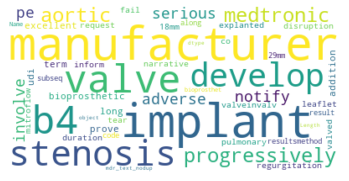

In [13]:
#Implement Word Cloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(dfmain["mdr_text_nodup"]))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('foo.png')
plt.show()

In [14]:
#Create new date field with the days removed, for visualizations

#dfmain = pd.read_csv("data.csv", encoding = 'unicode_escape')
#dfmain['mdr_text_nodup'] = dfmain['mdr_text_nodup'].map(str)

dfmain["year"] = pd.to_datetime(dfmain["date_received"], format = '%Y-%m-%d').dt.year
dfmain["month"] = pd.to_datetime(dfmain["date_received"], format = '%Y-%m-%d').dt.month

dfmain["plaindate"] = pd.to_datetime(dfmain[['year', 'month']].assign(DAY=1))

dfmain = dfmain.drop(["year","month"], 1)

dfmain.head()

#dfmain.to_csv(r'data_organ.csv', index = False)

C:\Users\Allen\AppData\Local\Temp\ipykernel_1920\1511539803.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dfmain = dfmain.drop(["year","month"], 1)


,product_code,brand_name,generic_name,manufacturer_name,type_of_report,report_number,report_source_code,date_received,event_type,mdr_text,mdr_text_nodup,plaindate
0,LWR,PERCEVAL SUTURELESS AORTIC HEART VALVE,TISSUE HEART VALVE,LIVANOVA CANADA CORP.,"Initial submission, Followup, Followup",1718850-2020-01047,Distributor report,2020-03-20,Injury,manufacturer notify serious adverse involve pe...,manufacturer notify serious adverse involve pe...,2020-03-01
1,DYE,CARPENTIER-EDWARDS PERIMOUNT MAGNA MITRAL EASE...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup, Followup",2015691-2020-10062,Manufacturer report,2020-01-07,Injury,bioprosthetic valve prove excellent long term ...,bioprosthetic valve prove excellent long term ...,2020-01-01
2,DYE,INSPIRIS RESILIA AORTIC VALVE,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup, Followup, Follow...",2015691-2020-10677,Manufacturer report,2020-02-25,Injury,udi b4 stenosis develop progressively addition...,udi b4 stenosis develop progressively addition...,2020-02-01
3,DYE,CARPENTIER-EDWARDS PERIMOUNT MAGNA EASE PERICA...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup",2015691-2020-10709,Manufacturer report,2020-02-27,Injury,stenosis regurgitation develop progressively a...,stenosis regurgitation develop progressively a...,2020-02-01
4,MWH,CONTEGRA,"CONDUIT,VALVED,PULMONIC",MEDTRONIC HEART VALVE DIVISION,"Initial submission, Followup",2025587-2020-00676,Manufacturer report,2020-03-05,Injury,medtronic 8 9 implant 18mm pulmonary valved co...,medtronic 8 9 implant 18mm pulmonary valved co...,2020-03-01


In [15]:
dfmain.head()

,product_code,brand_name,generic_name,manufacturer_name,type_of_report,report_number,report_source_code,date_received,event_type,mdr_text,mdr_text_nodup,plaindate
0,LWR,PERCEVAL SUTURELESS AORTIC HEART VALVE,TISSUE HEART VALVE,LIVANOVA CANADA CORP.,"Initial submission, Followup, Followup",1718850-2020-01047,Distributor report,2020-03-20,Injury,manufacturer notify serious adverse involve pe...,manufacturer notify serious adverse involve pe...,2020-03-01
1,DYE,CARPENTIER-EDWARDS PERIMOUNT MAGNA MITRAL EASE...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup, Followup",2015691-2020-10062,Manufacturer report,2020-01-07,Injury,bioprosthetic valve prove excellent long term ...,bioprosthetic valve prove excellent long term ...,2020-01-01
2,DYE,INSPIRIS RESILIA AORTIC VALVE,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup, Followup, Follow...",2015691-2020-10677,Manufacturer report,2020-02-25,Injury,udi b4 stenosis develop progressively addition...,udi b4 stenosis develop progressively addition...,2020-02-01
3,DYE,CARPENTIER-EDWARDS PERIMOUNT MAGNA EASE PERICA...,REPLACEMENT HEART VALVE,EDWARDS LIFESCIENCES,"Initial submission, Followup",2015691-2020-10709,Manufacturer report,2020-02-27,Injury,stenosis regurgitation develop progressively a...,stenosis regurgitation develop progressively a...,2020-02-01
4,MWH,CONTEGRA,"CONDUIT,VALVED,PULMONIC",MEDTRONIC HEART VALVE DIVISION,"Initial submission, Followup",2025587-2020-00676,Manufacturer report,2020-03-05,Injury,medtronic 8 9 implant 18mm pulmonary valved co...,medtronic 8 9 implant 18mm pulmonary valved co...,2020-03-01


In [16]:
#Create new dataframe--list of unique words in data, separated by month
#dfmain = pd.read_csv("data_vent.csv", encoding = 'unicode_escape')
#dfmain['mdr_text_nodup'] = dfmain['mdr_text_nodup'].map(str)

dfword = pd.DataFrame()

#Create unique list of dates to be used in the for loop
datelist = dfmain["plaindate"].unique()

#Loop to create dataframe of unique words and the number of times they each appear
wordnumbers = []
for squid in datelist:
    wordnumbers = Counter(' '.join(map(lambda l: ''.join(l), dfmain.loc[dfmain["plaindate"] == squid]["mdr_text_nodup"])).split(" ")) 
    dftemp = pd.DataFrame.from_dict(wordnumbers, orient='index').reset_index()
    dftemp["Date"] = squid
    dfword = pd.concat([dfword, dftemp])
    
dfword.columns = ["word","counts","date"]

#Add column for % representation of each word during their time period
def percentcalc(countcol, datecol):
    perc = 0
    perc = countcol / len(dfmain[dfmain["plaindate"] == datecol])
    return perc

dfword["percent"] = dfword.apply(lambda x: percentcalc(x['counts'],x['date']), axis = 1)

dfword.head()
dfword.to_csv(r'word.csv', index = False)
dfmain.to_csv(r'main.csv', index = False)

In [ ]:
dfmain.h